In [1]:
%load_ext autoreload
%autoreload 2

# ZFEL example

In [2]:
from zfel import sase1d
import zfel.plot

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Input 

In [3]:
sase_input = dict(
    npart   = 512,                       # n-macro-particles per bucket 
    s_steps = 200,                      # n-sample points along bunch length
    z_steps = 200,                      # n-sample points along undulator
    energy  = 4313.34e6,                # electron energy [eV]
    eSpread = 0,                       # relative rms energy spread [1]
    emitN   = 1.2e-6,                    # normalized transverse emittance [m-rad]
    currentMax = 3400,                   # peak current [Ampere]
    beta = 26,                          # mean beta [meter]
    unduPeriod = 0.03,                 # undulator period [meter]
    unduK = np.full(200, 3.5) ,          # undulator parameter, K [1], array could taper. 
    unduL = 70,                         # length of undulator [meter]
    radWavelength=None,                 # Will calculate based on resonance condition for unduK[0]
    random_seed=31,                     # for reproducibility
    particle_position=None, #np.genfromtxt('./Inputs/particle_position.csv', delimiter=',') # or None,
    hist_rule='square-root',             # 'square-root' or 'sturges' or 'rice-rule' or 'self-design', number \
                                       #  of intervals to generate the histogram of eta value in a bucket
    iopt='sase'
)

## Intermediate parameters 

These are used internally

In [4]:
sase1d.params_calc(sase_input)

{'unduJJ': array([0.74435607]),
 'gamma0': 8440.994001045716,
 'sigmaX2': 3.6962471476860163e-09,
 'kappa_1': array([1.39623026e-12]),
 'density': 3.047942438676862e+21,
 'Kai': array([3.57776241e-14]),
 'ku': 209.43951023931956,
 'resWavelength': 1.4999920058175574e-09,
 'Pbeam': 14665356000000.0,
 'coopLength': 4.999973352725192e-08,
 'z0': 70,
 'delt': 0.35,
 'dels': 0.35,
 'E02': 0.0,
 'gbar': 0.0,
 'delg': 0,
 'Ns': 1238749.1396010534,
 'deta': array([0.]),
 'rho': array([0.00095382])}

## Run

In [5]:
%%time
output = sase1d.sase(sase_input)

CPU times: user 6.59 s, sys: 46.6 ms, total: 6.64 s
Wall time: 6.69 s


In [6]:
output.keys()

dict_keys(['Er', 'Ei', 'thet', 'eta', 'power_s', 'power_z', 'spectrum', 'params', 's', 'z', 'bunchLength', 'bunch_steps', 'freq'])

## Plot output

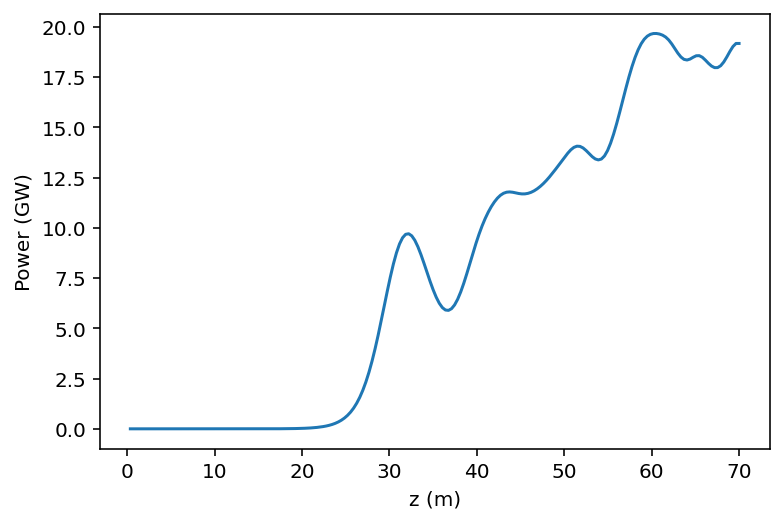

In [7]:
plt.ylabel('Power (GW)')
plt.xlabel('z (m)')
plt.plot(output['z'], output['power_z']/1e9)

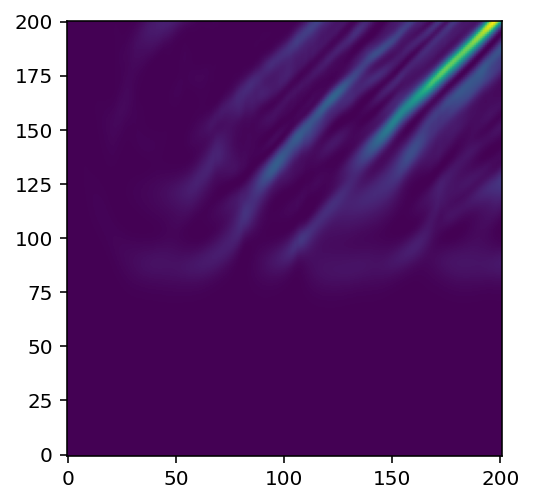

In [8]:
# Power evolution. z vs slice
plt.imshow( (output['Er']**2 + output['Ei']**2).T, origin='lower')

/Users/chrisonian/Code/GitHub/zfel/zfel/plot.py:8: RuntimeWarning: divide by zero encountered in log10
  plt.plot(z,np.log10(power_z))


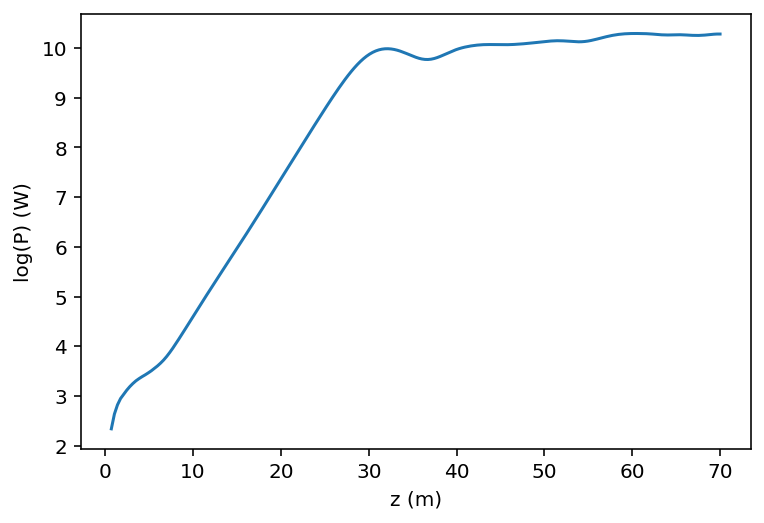

In [9]:
zfel.plot.plot_log_power_z(output)

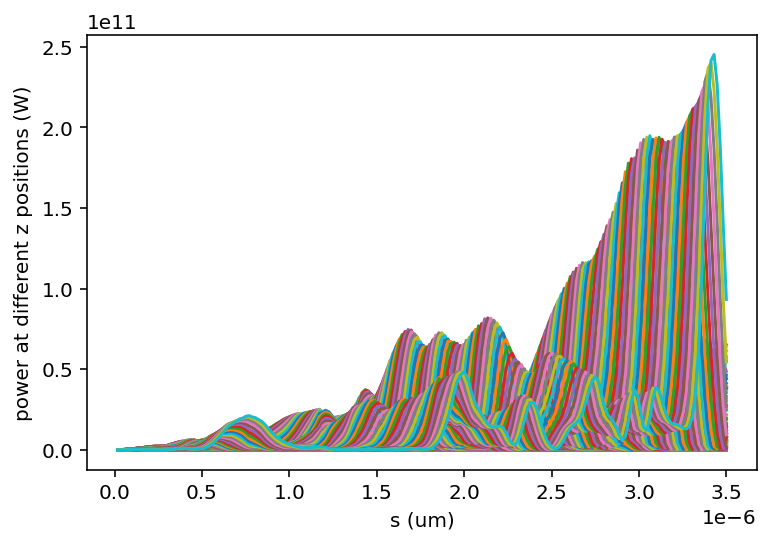

In [10]:
zfel.plot.plot_power_s(output)

Text(0, 0.5, 'spectrum (W/?)')

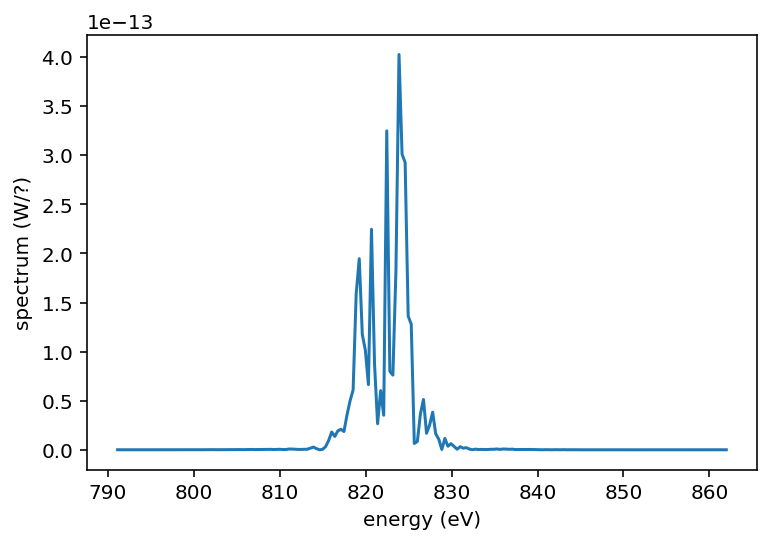

In [11]:
# plot spectrum
freq = output['freq']
spectrum = output['spectrum']
plt.plot(freq,spectrum[1:,-1])
plt.xlabel('energy (eV)')
plt.ylabel('spectrum (W/?)')